In [46]:
import pathlib

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
results_files = pathlib.Path("./data/").glob("results*")
results = []
for f in results_files:
    df = pd.read_csv(f)
    parts = str(f).replace(".csv", "").split("_")
    df['num_agents'] = int(parts[1])
    df['num_items'] = int(parts[2])
    df['num_weeks'] = int(parts[3])
    results.append(df)
results = pd.concat(results).reset_index(drop=True)

In [35]:
def parse_results(s):
    parts = s.split(",")
    stat = float(parts[0].split("=")[-1])
    pval = float(parts[1].split("=")[-1].replace(")", ""))
    return [stat, pval]

In [36]:
results['time_split'] = results['time_ks'].apply(parse_results)
results['churn_split'] = results['churn_ks'].apply(parse_results)

In [37]:
time = pd.DataFrame(results['time_split'].tolist(), columns=["time_stat", "time_pval"])
churn = pd.DataFrame(results['churn_split'].tolist(), columns=["churn_stat", "churn_pval"])
results = pd.concat([results.drop(columns=['time_ks', 'churn_ks', 'time_split', 'churn_split']), time, churn], axis=1)

In [38]:
results.sort_values(by=["mean_jsd", "time_stat", "churn_stat"], ascending=True)

,pop,pl,mean_jsd,num_agents,num_items,num_weeks,time_stat,time_pval,churn_stat,churn_pval
35,0.60,1.000000,0.149809,2000000,116,36,0.307692,0.588196,0.371429,1.530453e-02
15,0.75,1.000000,0.156501,1000000,116,36,0.384615,0.299920,0.285714,1.150772e-01
50,0.70,1.555556,0.159607,2000000,116,36,0.230769,0.897806,0.314286,6.254809e-02
12,0.50,1.500000,0.161959,1000000,116,36,0.230769,0.897806,0.514286,1.404438e-04
31,0.50,1.666667,0.172317,2000000,116,36,0.285714,0.635485,0.514286,1.404438e-04
...,...,...,...,...,...,...,...,...,...,...
47,0.70,1.222222,0.280049,2000000,116,36,0.250000,0.716412,0.628571,8.461968e-07
20,1.00,1.000000,0.306926,1000000,116,36,0.538462,0.044272,1.000000,1.782749e-20
24,1.00,2.000000,0.329638,1000000,116,36,0.538462,0.044272,0.971429,1.247924e-18
23,1.00,1.750000,0.335940,1000000,116,36,0.461538,0.126488,0.971429,1.247924e-18


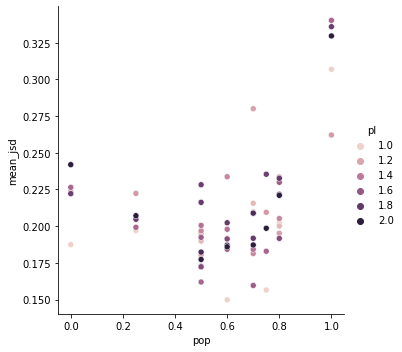

In [7]:
sns.relplot(data=results, x="pop", y="mean_jsd", hue="pl")

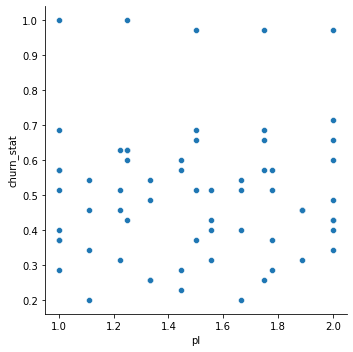

In [58]:
sns.relplot(data=results, x="pl", y="churn_stat")

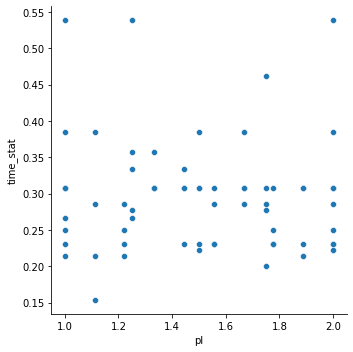

In [59]:
sns.relplot(data=results, x="pl", y="time_stat")

<AxesSubplot:xlabel='pl', ylabel='mean_jsd'>

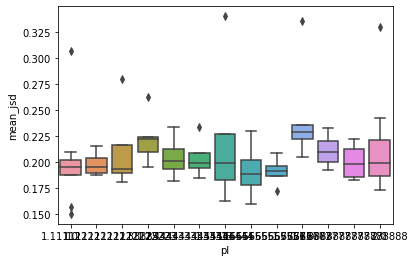

In [28]:
sns.boxplot(data=results, x="pl", y="mean_jsd")

In [57]:
est = smf.ols(formula="mean_jsd ~ 1 + pop + I(pop ** 2.0) + pl + num_agents", data=results).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mean_jsd   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     22.72
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.84e-11
Time:                        12:40:32   Log-Likelihood:                 149.65
No. Observations:                  65   AIC:                            -289.3
Df Residuals:                      60   BIC:                            -278.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2241      0.018     12.114      0.000       0.187       0.261
pop              -0.2289      0.048     -4.720      0.000      -0.326      -0.132
I(pop ** 2.0)     0.2901      0.045      6.476      0.000       0.201       0.380
pl                0.0112      0.009      1.190      0.239      -0.008       0.030
num_agents    -9.483e-09   7.99e-09     -1.187      0.240   -2.55e-08    6.49e-09
==============================================================================
Omnibus:                        3.990   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.355
Skew:                           0.333   Prob(JB):                        0.187
Kurtosis:                       3.892   Cond. No.                     3.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
est = smf.ols(formula="churn_stat ~ 1 + pop + pl + num_agents", data=results).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             churn_stat   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     8.875
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           5.74e-05
Time:                        12:41:32   Log-Likelihood:                 27.337
No. Observations:                  65   AIC:                            -46.67
Df Residuals:                      61   BIC:                            -37.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8161      0.120      6.826      0.000       0.577       1.055
pop            0.0339      0.086      0.393      0.695      -0.138       0.206
pl             0.0164      0.061      0.269      0.789      -0.106       0.139
num_agents -2.199e-07   4.38e-08     -5.025      0.000   -3.07e-07   -1.32e-07
==============================================================================
Omnibus:                        0.270   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.023
Skew:                           0.028   Prob(JB):                        0.989
Kurtosis:                       3.072   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
est = smf.ols(formula="time_stat ~ 1 + pop + pl + num_agents", data=results).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              time_stat   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     8.829
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.01e-05
Time:                        12:41:45   Log-Likelihood:                 86.502
No. Observations:                  65   AIC:                            -165.0
Df Residuals:                      61   BIC:                            -156.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3310      0.048      6.879      0.000       0.235       0.427
pop            0.1514      0.035      4.366      0.000       0.082       0.221
pl            -0.0100      0.025     -0.406      0.686      -0.059       0.039
num_agents -6.804e-08   1.76e-08     -3.863      0.000   -1.03e-07   -3.28e-08
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.411
Skew:                           0.169   Prob(JB):                        0.814
Kurtosis:                       3.195   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
results.groupby("pl").median()['mean_jsd'].sort_values()

pl
1.555556    0.188333
1.666667    0.191494
1.222222    0.193443
1.111111    0.194965
1.000000    0.195116
1.888889    0.197957
2.000000    0.198568
1.444444    0.199195
1.500000    0.199240
1.333333    0.201033
1.777778    0.209284
1.250000    0.222320
1.750000    0.228259
Name: mean_jsd, dtype: float64